In [1]:
import math
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from os import path
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np

In [2]:
in_folder = '../Data/referrer-monthly-host-countries_processed'
monthly_dataframes = []

for year in range(2014, 2023):
    for month in range(1, 13):
        in_path = f'{in_folder}/{year}/{year}-{month}.csv'

        if path.exists(in_path):
            df = pd.read_csv(in_path)

            # print(df.head())
            country_count_df = df[['host', 'count']].groupby('host').sum().reset_index()
            # print(country_count_df.head())
            country_count_df['year'] = year
            country_count_df['month'] = month

            monthly_dataframes.append(country_count_df)
    
all_months = pd.concat(monthly_dataframes)

In [40]:
result = all_months.pivot(index=['year', 'month'], values='count', columns='host')
result_no_websdr = result.drop('websdr.ewi.utwente.nl', axis=1)

In [113]:
amount_of_hosts = result.count(axis=1)

data = amount_of_hosts.tolist()

xAxis = [year for year in range(2014,2024)]
xTicks = [i for i in range(0,10*12,12)]

[1585, 1384, 1531, 1300, 1377, 1393, 1440, 1408, 1381, 1409]

ValueError: x and y must have same first dimension, but have shapes (106,) and (2,)

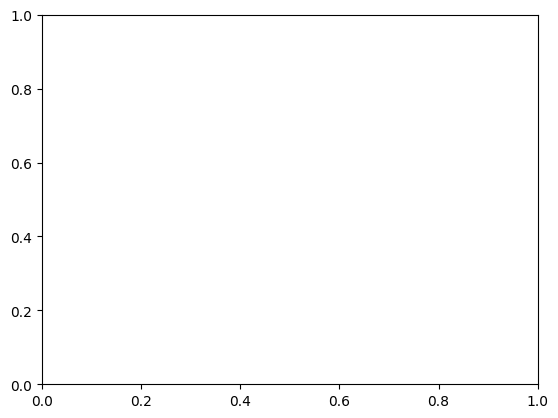

In [117]:
x = [i for i in range(0,len(data))]
y = data

# z = np.polyfit(x, y, deg=1)
# p = np.poly1d(z)

plt.plot(data)
plt.xticks(xTicks, xAxis, rotation=90)
plt.xlabel("Date")
plt.ylabel("Unique referrers")
plt.trend

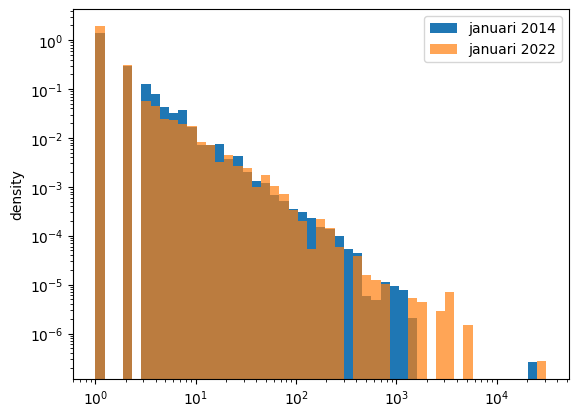

In [42]:
host_distribution_start = result_no_websdr.loc[(2014, 1)]
host_distribution_start = host_distribution_start[~host_distribution_start.isna()]

host_distribution_end = result_no_websdr.loc[(2022, 1)]
host_distribution_end = host_distribution_end[~host_distribution_end.isna()]

max_referrals = int(max(host_distribution_start.max(), host_distribution_end.max()))

exponential_buckets = np.logspace(0, np.log10(max_referrals + 1000))

start_hist = host_distribution_start.plot.hist(bins=exponential_buckets, density=True)
end_hist = host_distribution_end.plot.hist(bins=exponential_buckets, density=True, alpha=0.7)
# plt.plot([0, max_referrals], [])
plt.xscale('log')
plt.yscale('log')
plt.ylabel('density')
plt.legend(['januari 2014', 'januari 2022'])
plt.show()

1400 1584
144


<AxesSubplot: ylabel='Density'>

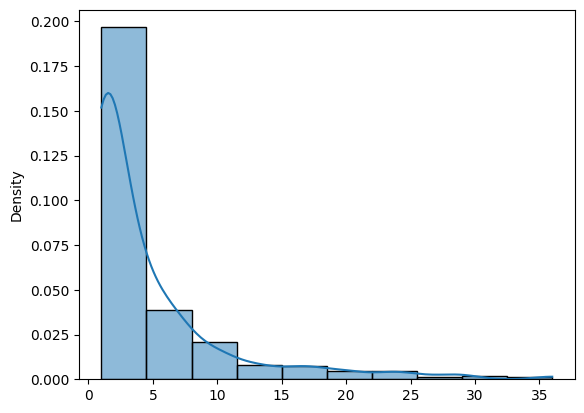

In [105]:
import seaborn as sns

allValues = result_no_websdr.loc[(2014, 1)]
allValues = allValues[~allValues.isna()]

intermediate = allValues.tolist()
intermediate.sort()
filteredData = [i for i in intermediate if intermediate.count(i) > 5]
print(len(filteredData), len(intermediate))

uniqueData = list(set(intermediate))
print(len(uniqueData))

sns.histplot(filteredData, kde=True, stat='density', bins=10)